## Polynomial Fitting [42 points] 
In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.  

```python=
## example code
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 
import numpy as np 
noise_scale = 100 
number_of_samples = 50 
x =  30*(np.random.rand(number_of_samples, 1) - 0.5) 
y = 6 * x + 7 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'ro') 
```

### 1. Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 1, 2, 3, 4, 5, 6. After plotting, explain how the choice of m influences the fit, considering concepts of overfitting and underfitting. 

Ans: from the definition of overfitting and underfitting.
Overfitting: The model is too specific to training data but not general enough for new examples. It usually happens when the model is very complex but not trained with sufficient training data.
Underfitting: The model is too simple to extract the important features of data. This usually happens when the model is overly simple.

We can notice from plot, select m from 1 ~ 2 are underfitting, and from 3 ~ 6 is fitting.
If we face underfitting, we can try to let m become higher.

In [2]:
# Personal repo: https://github.com/hogan-tech/SIT/blob/main/AppliedMachineLearning/HW1-1/hw1-2.ipynb
# Author: Hogan Lin
# Date: Sep 17/2024
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

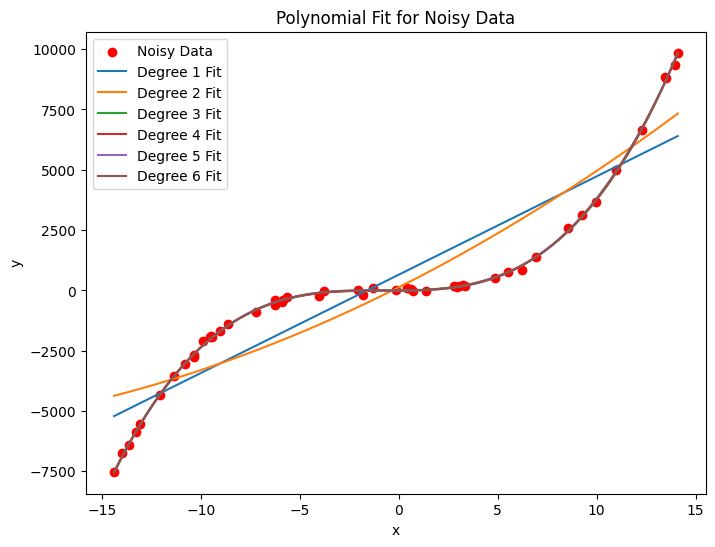

In [10]:
# Setting random seed for reproducibility
np.random.seed(42)

# Given variables
noiseScale = 100
numberOfSamples = 50

# Generate data

x = 30 * (np.random.rand(numberOfSamples, 1) - 0.5)
y = 6 * x + 7 * x**2 + 3 * x**3 + noiseScale * \
    np.random.randn(numberOfSamples, 1)

# Flatten x and y for easier usage
x = x.flatten()
y = y.flatten()

# Plot noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', label='Noisy Data')

# Polynomial fitting for different values of m from 1 ~ 6
for m in range(1, 7):
    coeffs = np.polyfit(x, y, m)
    poly = np.poly1d(coeffs)

    # Generate x and y for smooth plotting
    xVals = np.linspace(min(x), max(x), 100)
    yVals = poly(xVals)

    plt.plot(xVals, yVals, label=f'Degree {m} Fit')

plt.title('Polynomial Fit for Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6 respectively. Identify the best choice of m.

Ans: from the MSE plot, we need to avoid 1, 2 for the underfitting, we might choose 3 ~ 6 as our m.

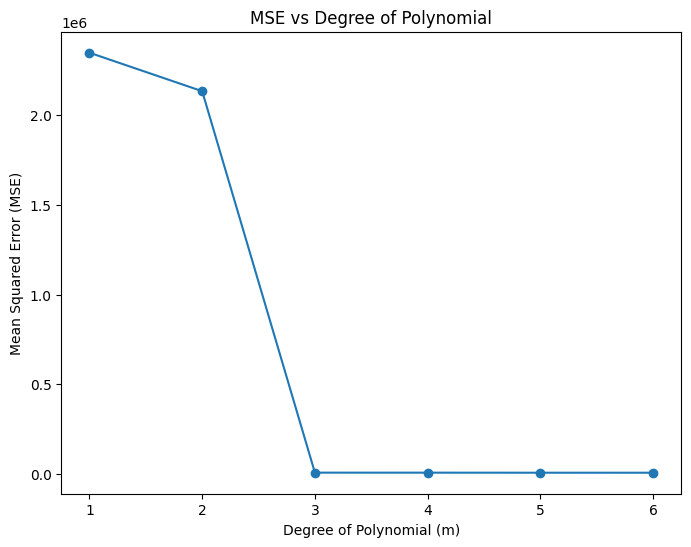

In [4]:
mseValues = []

plt.figure(figsize=(8, 6))

for m in range(1, 7):
    # Fit polynomial of degree m
    coeffs = np.polyfit(x, y, m)
    poly = np.poly1d(coeffs)
    
    # Predict values
    yPred = poly(x)
    
    # Use sklearn.metrics api to calculate MSE 
    mse = mean_squared_error(y, yPred)
    mseValues.append(mse)

plt.plot(range(1, 7), mseValues, marker='o')
plt.title('MSE vs Degree of Polynomial')
plt.xlabel('Degree of Polynomial (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

### 3. Change variable noise_scale to 150, 250, 350, 550, 750, and 950 respectively, re-run the algorithm, and plot the polynomials with the best m found in (2). Discuss the impact of increasing noise on the accuracy and reliability of the polynomial parameters. How does the model's performance degrade with increasing noise?

Ans: From the plot, we can notice that if the noise_scale become greater, then the model performance.
Adding noise can (seem to) improve prediction if the method of developing the predictions is overfitting. 
Likewise if you are overfitting you can improve prediction by deleting progressively more of your data.

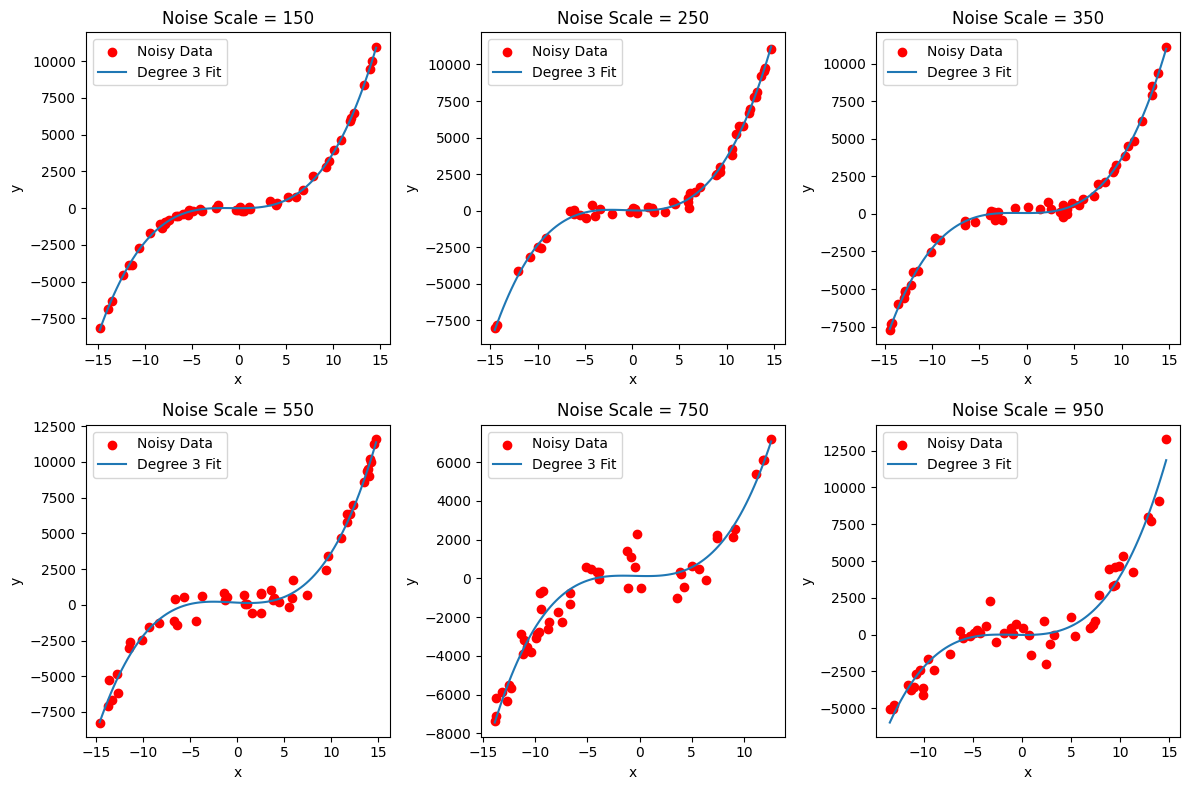

In [5]:
noise_levels = [150, 250, 350, 550, 750, 950]

plt.figure(figsize=(12, 8))

bestM = 3  # Assuming best degree from part 2

for i, noiseScale in enumerate(noise_levels):
    # Generate noisy data
    x = 30 * (np.random.rand(numberOfSamples, 1) - 0.5)
    y = 6 * x + 7 * x**2 + 3 * x**3 + noiseScale * \
        np.random.randn(numberOfSamples, 1)
    x = x.flatten()
    y = y.flatten()

    # Fit the polynomial with degree = bestM
    coeffs = np.polyfit(x, y, bestM)
    poly = np.poly1d(coeffs)

    # Plot data
    plt.subplot(2, 3, i + 1)
    plt.scatter(x, y, color='red', label='Noisy Data')

    # Generate values for smooth curve
    xVals = np.linspace(min(x), max(x), 100)
    yVals = poly(xVals)

    # Plot polynomial
    plt.plot(xVals, yVals, label=f'Degree {bestM} Fit')
    plt.title(f'Noise Scale = {noiseScale}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

### 4. Change variable number_of_samples to 100, 80, 40, 30, 20, and 10 respectively, re-run the algorithm, and plot the polynomials with the m found in (ii). Discuss the impact of the number of samples on the accuracy of the returned parameters. 

Ans: From the plot, we can notice that if the data amount is greater, then the result will become more accuracy.

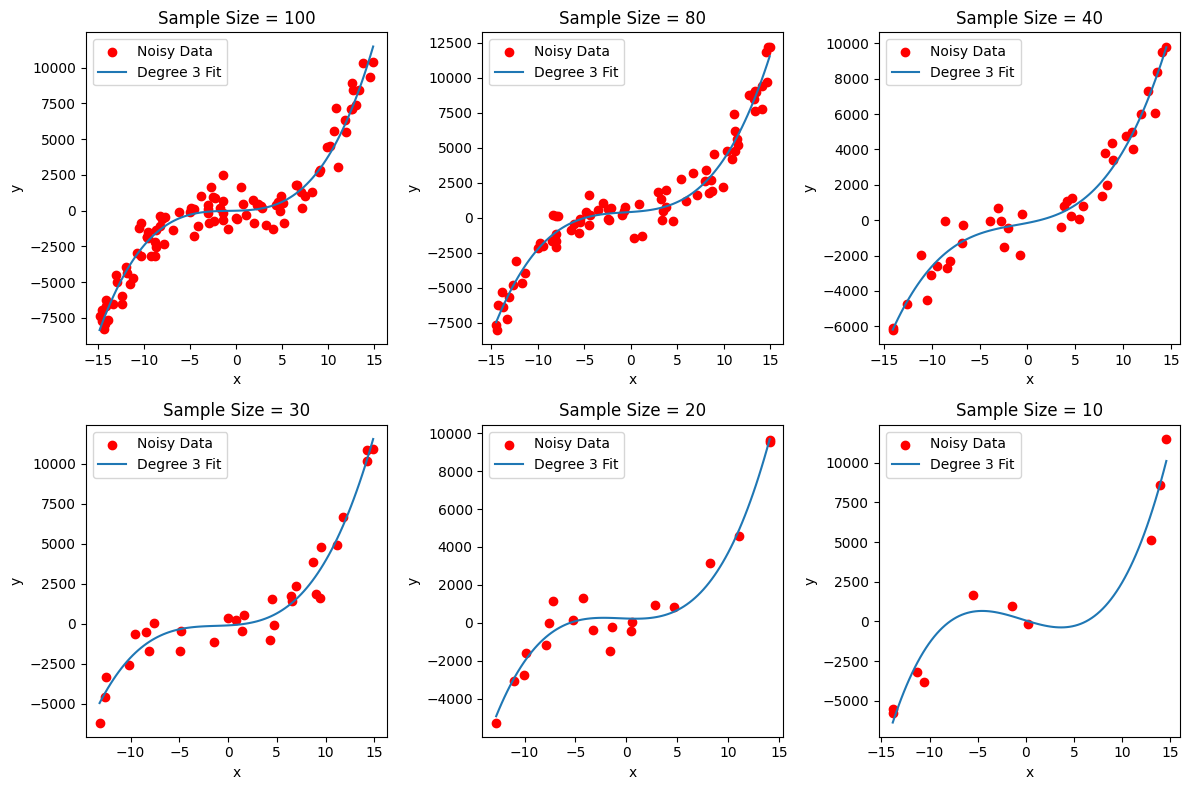

In [6]:
sampleSizes = [100, 80, 40, 30, 20, 10]

plt.figure(figsize=(12, 8))

for i, numberOfSamples in enumerate(sampleSizes):
    # Generate noisy data
    x = 30 * (np.random.rand(numberOfSamples, 1) - 0.5)
    y = 6 * x + 7 * x**2 + 3 * x**3 + noiseScale * np.random.randn(numberOfSamples, 1)
    x = x.flatten()
    y = y.flatten()

    # Fit the polynomial with degree = bestM
    coeffs = np.polyfit(x, y, bestM)
    poly = np.poly1d(coeffs)
    
    # Plot data
    plt.subplot(2, 3, i + 1)
    plt.scatter(x, y, color='red', label='Noisy Data')
    
    # Generate values for smooth curve
    xVals = np.linspace(min(x), max(x), 100)
    yVals = poly(xVals)
    
    # Plot polynomial
    plt.plot(xVals, yVals, label=f'Degree {bestM} Fit')
    plt.title(f'Sample Size = {numberOfSamples}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


### 5. (Bonus) Implement regularization techniques (such as ridge regression or lasso) in the polynomial fitting process. Discuss the regularized models with the unregularized ones in terms of MSE. Discuss the benefits and drawbacks of using regularization in this context. When is regularization necessary, and how does it help improve model performance?

Ans: 
1. L1 Regularization also known as Lasso Regression, L1 Regularization adds an absolute value of magnitude of coefficient as a penalty term to the loss function.The pros of L1 regularization include feature selection and improved model interpretability. However, it can produce unstable solutions in the presence of highly correlated features, arbitrarily choosing one and disregarding the others.

2. L2 regularization, or Ridge Regression, adds a penalty term, the square of the magnitude of coefficients, to the loss function.The key advantage of L2 regularization is it prevents overfitting without eliminating input features. However, it doesn’t result in sparse models, making it less effective for feature selection.

3. If the regularization is necessary, then the better way to improve model performance is to reduce the model's complexity to make it more generalizable to new data.

In [7]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Ridge regularization with degree 3 (bestM)
ridgeModel = make_pipeline(PolynomialFeatures(degree=bestM), Ridge(alpha=1.0))
ridgeModel.fit(x.reshape(-1, 1), y)

# Predictions and MSE
yRidgePred = ridgeModel.predict(x.reshape(-1, 1))
mseRidge = mean_squared_error(y, yRidgePred)

# Compare MSE with unregularized model
coeffs = np.polyfit(x, y, bestM)
poly = np.poly1d(coeffs)
yUnregPred = poly(x)
mseUnreg = mean_squared_error(y, yUnregPred)

print(f'MSE (Ridge Regularization): {mseRidge}')
print(f'MSE (Unregularized): {mseUnreg}')


MSE (Ridge Regularization): 1108999.618873501
MSE (Unregularized): 1108905.3228743412
